<font color="purple" size=8>Image Segmention</font>

<font color="green" size=5>1 : Image Processing "Using color spaces" </font>

## Reading the Image

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
nemo = cv2.imread("./FindingNemo/nemo0.jpg")

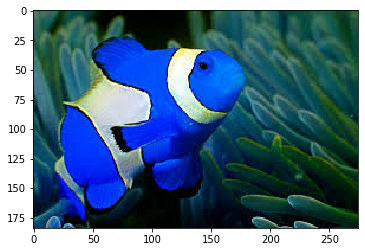

In [3]:
plt.imshow(nemo)
plt.show()

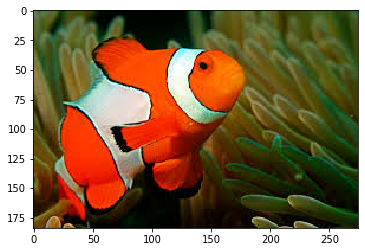

In [4]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

## Plotting 3-D Histograms in RGB

In [5]:
r, g, b = cv2.split(nemo)

In [6]:
r.shape

(184, 275)

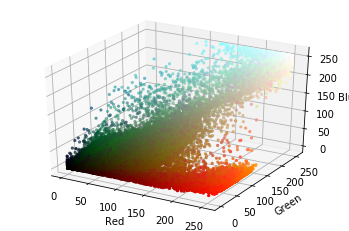

<Figure size 432x288 with 0 Axes>

In [14]:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb
import matplotlib.image as mpimg


fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()
plt.savefig('a.png')

## Plotting in HSV Color Space

In [8]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

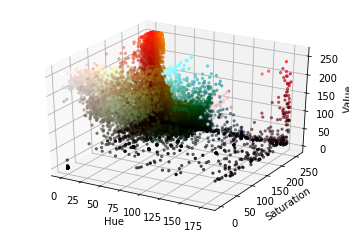

In [9]:
h, s, v = cv2.split(hsv_nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [10]:
light_orange = (1, 190, 200)  #in HSV color space
dark_orange = (18, 255, 255)

In [11]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [27]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

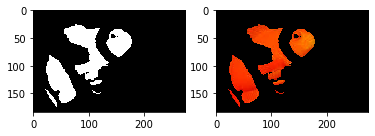

In [28]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

#### We found the orange portions all we need to do is to find the white portions

In [29]:
light_white = (0, 0, 200)  #in HSV Space
dark_white = (145, 60, 255)  #greyish in HSV

In [30]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

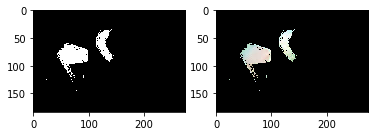

In [31]:
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

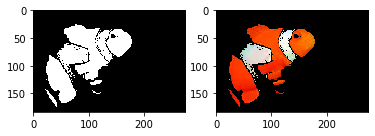

In [32]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


## Does it Generalize to other friends of Nemo?

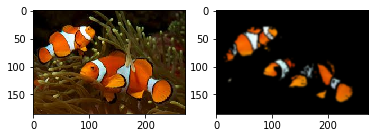

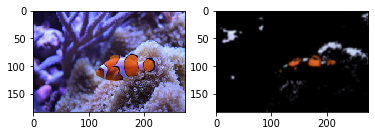

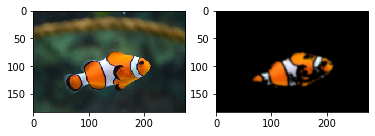

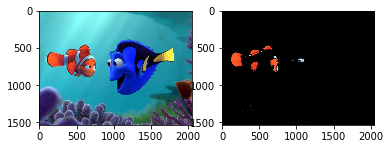

In [41]:
# Generalising the segmentation

path = "./FindingNemo/nemo"

nemos_friends = []
for i in range(5):
    friend = cv2.cvtColor(
        cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB
    )
    nemos_friends.append(friend)

def segment_fish(image):
    """ Attempts to segment the clown fish out of the provided image. """
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    result = cv2.GaussianBlur(result, (7, 7), 0)
    return result


results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 5):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()

<font color="green" size=5>1 : Image Processing "Bit-Plane Slicing" </font>

* The MSBs most significant bits contain foreground information and LSB contain background info.

In [38]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i2.wp.com/theailearner.com/wp-content/uploads/2019/01/bit-plane-slicing.png?w=662&ssl=1")

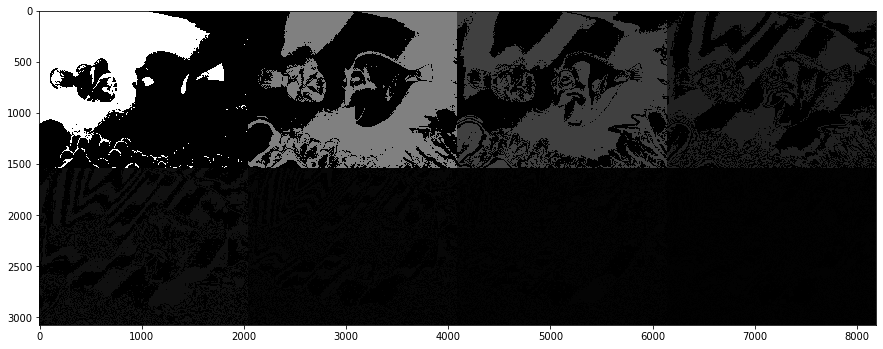

In [29]:
import numpy as np
import cv2
# Read the image in greyscale
img = cv2.imread("./FindingNemo/nemo4.jpg",0)
 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
 
# Display the images
plt.figure(figsize=(15,10))
plt.imshow(final,cmap="gray")
plt.show()

In [55]:
eight_bit_img = cv2.bitwise_not(eight_bit_img)
result = cv2.bitwise_and(img, img, mask=eight_bit_img)
result = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)

In [56]:
result = cv2.bitwise_and(img, img, mask=eight_bit_img)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

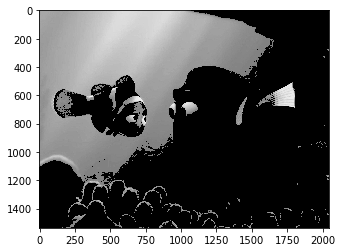

In [57]:
plt.imshow(result)
plt.show()

### Its better but It too didn't work!

<font color="green" size=5>Image segmentation using Histogram</font>

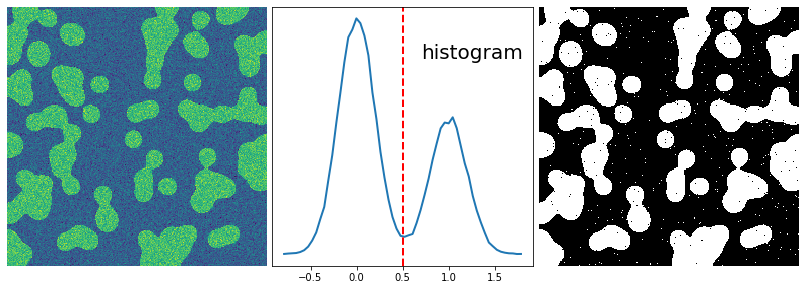

In [26]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)

mask += 0.1 * im

img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5

plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()


<font color="green" size=5>Watershed Algorithm for Image segmentation</font>

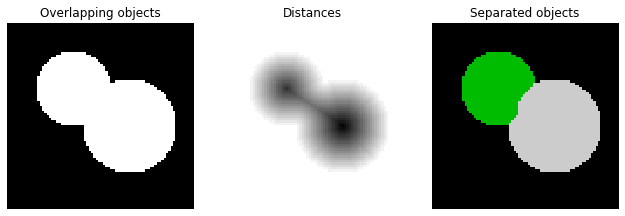

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

The watershed is a classical algorithm used for segmentation, that is, for separating different objects in an image.

Starting from user-defined markers, the watershed algorithm treats pixels values as a local topography (elevation). The algorithm floods basins from the markers until basins attributed to different markers meet on watershed lines. In many cases, markers are chosen as local minima of the image, from which basins are flooded.



In the example below, two overlapping circles are to be separated. To do so, one computes an image that is the distance to the background. The maxima of this distance (i.e., the minima of the opposite of the distance) are chosen as markers and the flooding of basins from such markers separates the two circles along a watershed line.

<font color="green" size=5>K-Means Clustering</font>

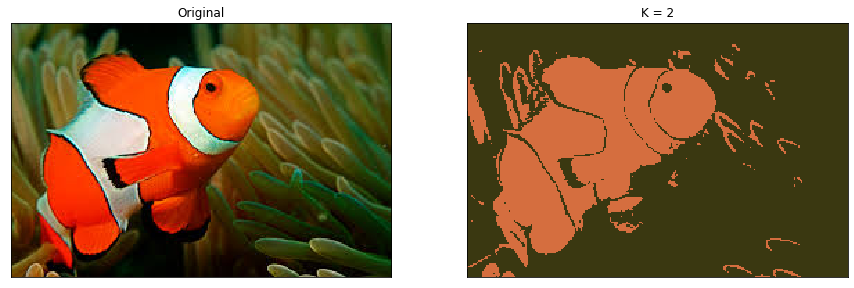

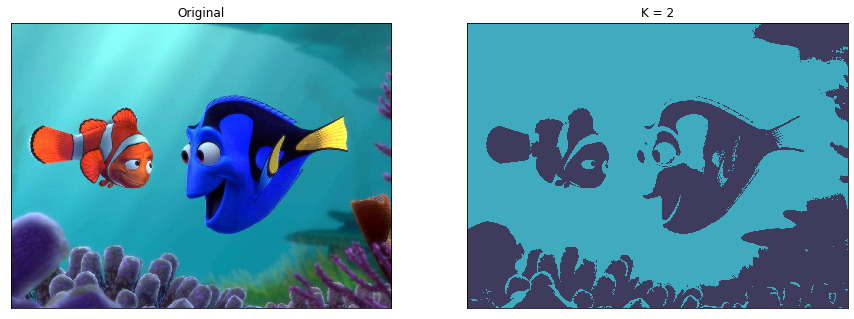

In [6]:
#SImple image segmentation using K-Means clustering algo

#color clustering
#Image segmentation from video using OpenCV and K-means clustering
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(0,5,4):
    original_image = cv2.imread("./FindingNemo/nemo{}.jpg".format(i))
    # Converting from BGR Colours Space to HSV
    img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1,3))
    # convert to np.float32
    vectorized = np.float32(vectorized)
    # Here we are applying k-means clustering so that the pixels around a colour are consistent and gave same BGR/HSV values
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # We are going to cluster with k = 2, because the image will have just two colours ,a white background and the colour of the patch
    K = 2
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    # Now convert back into uint8
    #now we have to access the labels to regenerate the clustered image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    #res2 is the result of the frame which has undergone k-means clustering
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(res2)
    plt.title('K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()